# Frecuencia de palabras por corpus de periodo (5 años)

In [1]:
# Importar librerias
import os
import pandas as pd
import numpy as np
import pickle
import sweetviz as sv

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from matplotlib import colormaps

# Colección
from collections import defaultdict
import re
from collections import Counter

In [2]:
# Configurar path
os.chdir('C://iamas_datos2024/proyectos_parlamentarios_2025/')
pd.set_option('display.max_colwidth', None)

In [3]:
# abrir
df = pickle.load(open('filtro_texto_df_ley_0923.pkl', 'rb'))
df.head()

,Proyecto.ID,Título,Título normalizado,Cant_token,Cant_token_normalizado,Proyecto_girado_a_comisiones_SALUD,Proyecto_SALUD,Resultado,Max_Orden,Tiene_antecedente_por_titulo_proy,Periodo,Tokens
0,HCDN272363,DECLARESE EL 2024 COMO AÑO DEL 140 ANIVERSARIO DE LA PROMULGACION DE LA LEY 1420 DE EDUCACION COMUN.,declarese ano aniversario promulgacion educacion comun,18,6,GIRADO A OTRAS COMISIONES,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2,False,NaN,"[declarese, ano, aniversario, promulgacion, educacion, comun]"
1,HCDN272359,"FINANCIAMIENTO DE LOS PARTIDOS POLITICOS - LEY 26215 - Y CODIGO ELECTORAL NACIONAL - LEY 19945 -. MODIFICACIONES SOBRE CONTRATACION DE PUBLICIDAD Y BOLETA UNICA, RESPECTIVAMENTE.",financiamiento partidos politicos codigo electoral nacional modificaciones contratacion publicidad boleta unica respectivamente,26,12,GIRADO A OTRAS COMISIONES,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,1,False,NaN,"[financiamiento, partidos, politicos, codigo, electoral, nacional, modificaciones, contratacion, publicidad, boleta, unica, respectivamente]"
2,HCDN272360,EMERGENCIA LABORAL PARA EL PERSONAL DE LA ADMINISTRACION PUBLICA NACIONAL.,emergencia laboral personal administracion publica nacional,10,6,GIRADO A OTRAS COMISIONES,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2,True,NaN,"[emergencia, laboral, personal, administracion, publica, nacional]"
3,HCDN272352,CODIGO PENAL DE LA NACION. MODIFICACION DE LOS ARTICULOS 155 Y 169 SOBRE DIFUSION DE CONTENIDO SEXUAL O EROTICO DE TERCEROS Y SIN AUTORIZACION.,codigo penal nacion s difusion contenido sexual erotico terceros autorizacion,24,10,GIRADO A OTRAS COMISIONES,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,2,False,NaN,"[codigo, penal, nacion, s, difusion, contenido, sexual, erotico, terceros, autorizacion]"
4,HCDN272353,REFORMA DEL ESTADO. DEROGACION Y MODIFICACION DE DIVERSAS LEYES Y DECRETOS.,reforma derogacion modificacion diversas leyes decretos,11,6,GIRADO A OTRAS COMISIONES,0.0,NO TUVO TRATAMIENTO POSTERIOR NI DICTAMEN,3,False,NaN,"[reforma, derogacion, modificacion, diversas, leyes, decretos]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33052 entries, 0 to 33051
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Proyecto.ID                         33052 non-null  object 
 1   Título                              33052 non-null  object 
 2   Título normalizado                  33052 non-null  object 
 3   Cant_token                          33052 non-null  int64  
 4   Cant_token_normalizado              33052 non-null  int64  
 5   Proyecto_girado_a_comisiones_SALUD  33052 non-null  object 
 6   Proyecto_SALUD                      33052 non-null  float64
 7   Resultado                           33052 non-null  object 
 8   Max_Orden                           33052 non-null  int64  
 9   Tiene_antecedente_por_titulo_proy   33052 non-null  bool   
 10  Periodo                             31502 non-null  float64
 11  Tokens                              33052

In [5]:
df.columns

Index(['Proyecto.ID', 'Título', 'Título normalizado', 'Cant_token',
       'Cant_token_normalizado', 'Proyecto_girado_a_comisiones_SALUD',
       'Proyecto_SALUD', 'Resultado', 'Max_Orden',
       'Tiene_antecedente_por_titulo_proy', 'Periodo', 'Tokens'],
      dtype='object')

In [6]:
df = df[df['Proyecto_SALUD']==1]
print("Conj. de datos de proyecto_SALUD con Nan en Período:",df.shape)
df = df[~df['Periodo'].isna()]
print("Conj. de datos de proyecto_SALUD sin Nan en Período:",df.shape)


Conj. de datos de proyecto_SALUD con Nan en Período: (2846, 12)
Conj. de datos de proyecto_SALUD sin Nan en Período: (2713, 12)


In [7]:
# Frecuencia de palabra
word_freq = defaultdict(int)

#### Períodos

In [8]:
df['Periodo_5anios'] = 2009
df.loc[(df['Año']>=2015) & (df['Año']<2020), 'Periodo_5anios'] =  2015
df.loc[(df['Año']>=2020) & (df['Año']<2024), 'Periodo_5anios'] =  2020

In [9]:
PER5anios_df = df.groupby('Periodo_5anios')['Título normalizado'].apply(' '.join).reset_index()
PER5anios_df.head(1)

Periodo_5anios  \
0            2010   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [19]:
freqs_list = []
for anios5 in PER5anios_df['Periodo_5anios'].to_list():
    print(anios5)
    subdf = PER5anios_df.loc[(PER5anios_df['Periodo_5anios']==anios5)]

    tell_all = subdf['Título normalizado'].iloc[0].lower()
    
    freqs = Counter()
    subdf['Título normalizado'].apply(lambda x: freqs.update(x.split()))
    print('finished counting')
    total_number = sum(freqs.values())
    print('total number of tokens:', total_number)

    freqs_df = pd.DataFrame.from_dict(freqs, orient='index',
                                      columns=['Frecuencia'])
    freqs_df = freqs_df.reset_index()

    freqs_df = freqs_df.rename(columns={'index': 'Palabra'})
    mask = (freqs_df['Palabra'].str.len() > 1)
    freqs_df = freqs_df.loc[mask]
    print('Removed entries with one character.')

    freqs_df = freqs_df.sort_values('Frecuencia').reset_index(drop=True)

    freqs_df['Porcentaje'] = freqs_df['Frecuencia'] / total_number

    
    freqs_df.to_csv('./archivos_salidas/frec_para_datos_limpios_por_desplaz_semantico_anios5_'+str(anios5)+'.csv', index=False)

    freqs_df['Período'] = str(anios5)
    
    freqs_list.append(freqs_df)
    



2010
finished counting
total number of tokens: 8562
Removed entries with one character.
2015
finished counting
total number of tokens: 9868
Removed entries with one character.
2020
finished counting
total number of tokens: 7137
Removed entries with one character.


Analizar las distribución de frecuencias de palabras por corpus

In [29]:
freqs_df = pd.concat(freqs_list)

In [45]:
freqs_df.sort_values(by = 'Frecuencia', ascending =False).head(10).Palabra.unique()

array(['nacional', 'creacion', 'reproduccion', 'regimen', 'programa',
       'salud'], dtype=object)

In [46]:
freqs_df.sort_values(by = 'Frecuencia', ascending =True).head(10).Palabra.unique()

array(['acciones', 'electrico', 'frecuencia', 'electromagneticos',
       'campos', 'epidemicas', 'endemicas', 'areas', 'procedan', 'viajen'],
      dtype=object)

In [34]:
freqs_df.describe(include = 'all')

,Palabra,Frecuencia,Porcentaje,Período
count,6050,6050.000000,6050.000000,6050
unique,3692,NaN,NaN,3
top,acciones,NaN,NaN,2015
freq,3,NaN,NaN,2170
mean,NaN,4.225950,0.000496,NaN
std,NaN,11.708944,0.001363,NaN
min,NaN,1.000000,0.000101,NaN
25%,NaN,1.000000,0.000117,NaN
50%,NaN,2.000000,0.000203,NaN
75%,NaN,3.000000,0.000405,NaN


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Frecuencia', ylabel='Count'>

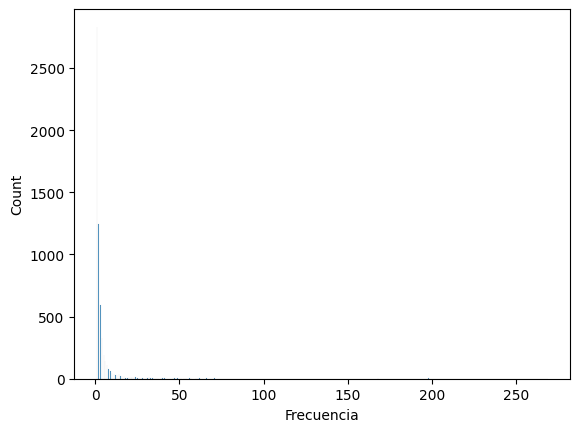

In [27]:
sns.histplot(x = 'Frecuencia', data=freqs_df) # hue='Período'

<Axes: xlabel='Frecuencia'>

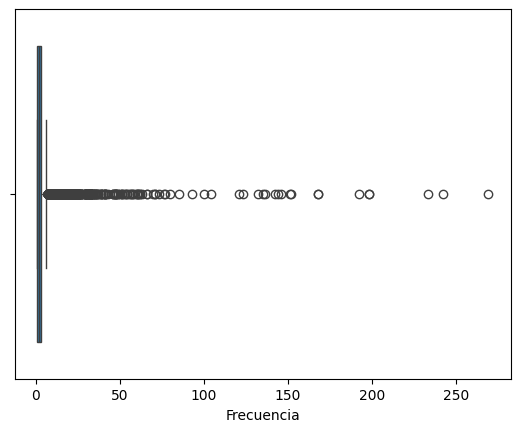

In [28]:
sns.boxplot(x = 'Frecuencia', data=freqs_df)

In [48]:
def eliminar_outliers_iqr(df, columna):
    """
    Separa los outliers y devuelve dos DataFrames:
    - df_limpio: sin outliers
    - df_outliers: con los valores atípicos detectados

    Parámetros:
    df (pd.DataFrame): DataFrame de pandas
    columna (str): Nombre de la columna a analizar

    Retorna:
    df_limpio (pd.DataFrame): DataFrame sin outliers
    df_outliers (pd.DataFrame): DataFrame solo con outliers
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar datos
    df_limpio = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    df_outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    return df_limpio, df_outliers    


In [49]:
# Detectar outliers
freqs_limpio_df , outliers_df = eliminar_outliers_iqr(freqs_df, 'Frecuencia')
display("Outliers detectados:\n", outliers_df)

'Outliers detectados:\n'

,Palabra,Frecuencia,Porcentaje,Período
1818,derecho,7,0.000818,2010
1819,gratuidad,7,0.000818,2010
1820,vacunas,7,0.000818,2010
1821,privada,7,0.000818,2010
1822,comision,7,0.000818,2010
...,...,...,...,...
1808,regimen,123,0.017234,2020
1809,programa,132,0.018495,2020
1810,salud,135,0.018916,2020
1811,creacion,152,0.021297,2020


In [50]:
outliers_df.Palabra.unique()

array(['derecho', 'gratuidad', 'vacunas', 'privada', 'comision',
       'trabajo', 'nutricional', 'paliativos', 'territorio', 'establece',
       'forma', 'perjudicial', 'consejo', 'leche', 'primaria',
       'instituciones', 'estudios', 'chagas', 'saludable', 'profesion',
       'sustitucion', 'sufren', 'maquinas', 'automaticos', 'pais',
       'humano', 'argentina', 'ciento', 'programas', 'enfermeria',
       'sanitario', 'termino', 'persona', 'modificatorias',
       'especialidades', 'localidades', 'fertilizacion', 'ayuda',
       'octubre', 'donantes', 'alzheimer', 'consecuencia', 'exhibicion',
       'administracion', 'inundaciones', 'junio', 'evaluacion',
       'establecer', 'respectivamente', 'entidades', 'envases',
       'medicinales', 'seguimiento', 'soberania', 'menores', 'diabeticos',
       'ganancias', 'meses', 'mujer', 'alimenticios', 'rotavirus',
       'cuidados', 'autonoma', 'implementacion', 'adolescentes',
       'sanitaria', 'actualizacion', 'prepaga', 'destinado

<Axes: xlabel='Frecuencia'>

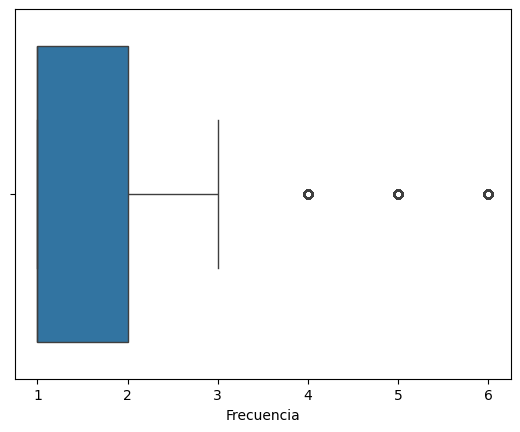

In [55]:
# Miramos distribución
sns.boxplot(x = 'Frecuencia', data=freqs_limpio_df)

<Axes: xlabel='Frecuencia', ylabel='Count'>

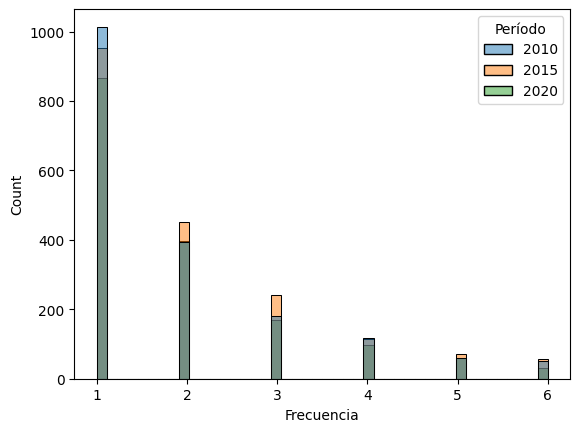

In [56]:
sns.histplot(x = 'Frecuencia', data=freqs_limpio_df,  hue='Período') 